# Pymaceuticals Inc.
---

## *Analysis*


#### <u>Observation 1</u>
- The mice submitted to the Capomulin regimen demonstrated a high correlation between weight and tumour volume, meaning that the heavier the mouse, the larger the tumour.

#### <u>Observation 2</u>
- Even though the tumour in mouse l509 increased its size at the beginning of the treatment with the Capomulin drug, it rapidly decreased after day 20, which indicates a positive reaction to the medicine. However, around day 35, the tumour started increasing again. Further measurements are required to assess more accurate results.

#### <u>Observation 3</u>
- Only one potential outlier was identified in the dataset for the four more promising treatment regimens. This represents that the data we are dealing with is of good quality, and the results can be considered reliable.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [3]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
# Display the mouse_metadata dataframe to identify potential keys for merging
mouse_metadata.head(2)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17


In [5]:
# Display the study_results dataframe to identify potential keys for merging
study_results.head(2)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0


In [6]:
# Combine the dataframes into a single dataframe
merged_df = pd.merge(study_results, mouse_metadata, on='Mouse ID')

# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [7]:
# Display the number of unique mice.
len(merged_df['Mouse ID'].unique())

249

In [8]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_ID = merged_df[merged_df.duplicated(['Mouse ID','Timepoint'])]
duplicate_ID['Mouse ID'].unique()

array(['g989'], dtype=object)

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_records = merged_df.loc[merged_df['Mouse ID']== 'g989']
g989_records

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_merged_df = merged_df.loc[merged_df['Mouse ID'] != 'g989']

# Checking the number of mice in the clean DataFrame.
len(clean_merged_df['Mouse ID'].unique())

## Summary Statistics

In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.

#  1st step - group the clean dataframe by Drug Regimen
grouped_by_regimen = clean_merged_df.groupby('Drug Regimen')

# Identify the average tumour volume by Drug Regiment and store in a series.
tumor_volume_mean = grouped_by_regimen['Tumor Volume (mm3)'].mean()

# Identify the median for tumour volumes by Drug Regiment and store in a series.
tumor_volume_median = grouped_by_regimen['Tumor Volume (mm3)'].median()

# Identify the variance for tumour volumes by Drug Regiment and store in a series.
tumor_volume_variance = grouped_by_regimen['Tumor Volume (mm3)'].var()

# Identify the standard deviation for tumour volumes by Drug Regiment and store in a series.
tumor_volume_std = grouped_by_regimen['Tumor Volume (mm3)'].std()

# Identify the standard error of the mean for the tumour volumes by Drug Regiment and store in a series.
tumor_volume_sem = grouped_by_regimen['Tumor Volume (mm3)'].sem()

In [20]:
# Assemble the resulting series into a single summary DataFrame.
summary_statistics_df = pd.DataFrame({'Mean Tumor Volume':tumor_volume_mean,
                                    'Median Tumor Volume':tumor_volume_median,
                                    'Tumor Volume Variance':tumor_volume_variance,
                                    'Tumor Volume Std Deviation':tumor_volume_std,
                                    'Tumor Volume Std Error':tumor_volume_sem,
                                    })

# Display the summary statistics dataframe
summary_statistics_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Deviation,Tumor Volume Std Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [21]:
# Identify the number of records for each drug regimen
regimen_count = clean_merged_df['Drug Regimen'].value_counts()
regimen_count

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

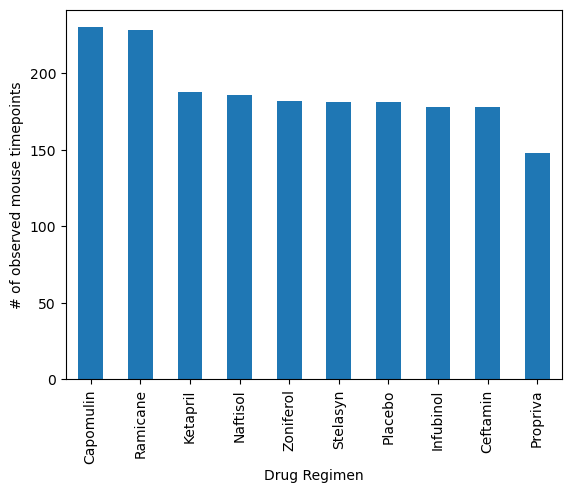

In [22]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Specify the series to be plotted
regimen_count.plot(kind='bar')

# Define the label for the x axis
plt.xlabel('Drug Regimen')

# Define label for the y axis
plt.ylabel('# of observed mouse timepoints')

# Display the graph
plt.show()

In [23]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Pass the index of the dataframe as a list to be used in the x axis
x_axis = list(regimen_count.index)

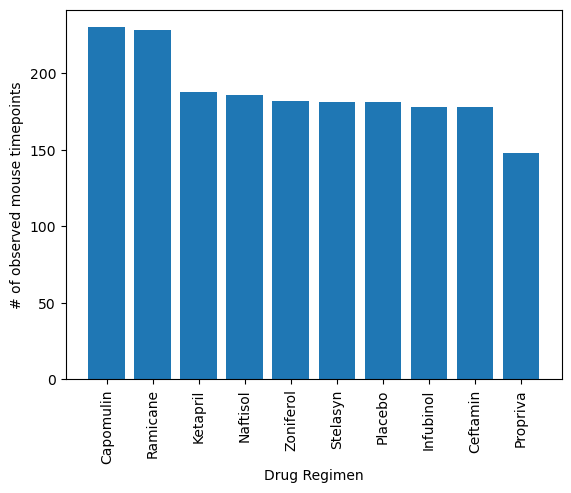

In [24]:
# Specify the type of chart and the axis
plt.bar(x_axis,regimen_count)

# Define the label for the x axis
plt.xlabel('Drug Regimen')

# Define the label for the y axis
plt.ylabel('# of observed mouse timepoints')

# Rotate the x axis labels so it can be read
plt.xticks(rotation = 'vertical')

# Display the graph
plt.show()

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Count how many of records of each sex type are in the dataset
sex_distribution = clean_merged_df['Sex'].value_counts()

# Use the index as labels for the graph
labels = list(sex_distribution.index)

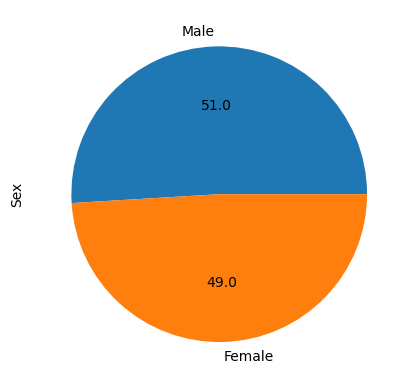

In [27]:
# Plot the graph using Pandas, identifying the type and displaying the percentage
sex_distribution.plot(kind='pie', autopct="%.1f")

# Display the graph
plt.show()

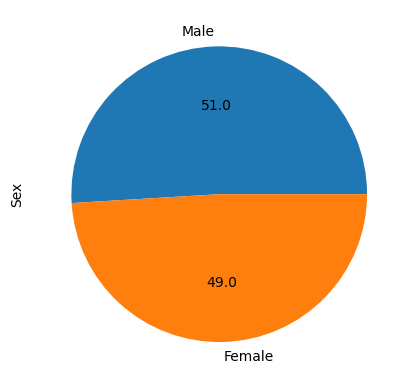

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Plot the chart, identyfing the dataset, labels and percentage format
plt.pie(sex_distribution, 
        labels = labels, 
        autopct="%.1f"
       )

# Include a label to the vertical axis
plt.ylabel('Sex')

# Display the graph
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
grouped_by_ID = clean_merged_df.groupby(['Mouse ID'])['Timepoint'].max()

# Merge the grouped df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = merged_df.merge(grouped_by_ID, on=['Mouse ID', 'Timepoint'], how='right')

# Display the merged dataframe for conference
final_tumor_volume.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
capomulin_tumor_data=[] 
ramicane_tumor_data=[]
infubinol_tumor_data=[]
ceftamin_tumor_data=[]


# Loop through the merged dataframe to populate the each empty list
for index, row in final_tumor_volume.iterrows():
        if row['Drug Regimen'] == 'Capomulin':
            capomulin_tumor_data.append(row['Tumor Volume (mm3)'])
        
        if row['Drug Regimen'] == 'Ramicane':
            ramicane_tumor_data.append(row['Tumor Volume (mm3)'])
            
        if row['Drug Regimen'] == 'Infubinol':
            infubinol_tumor_data.append(row['Tumor Volume (mm3)'])
            
        if row['Drug Regimen'] == 'Ceftamin':
            ceftamin_tumor_data.append(row['Tumor Volume (mm3)'])
         

In [ ]:
# Convert the lists into series
capomulin_series = pd.Series(capomulin_tumor_data)
ramicane_series = pd.Series(ramicane_tumor_data)
infubinol_series = pd.Series(infubinol_tumor_data)
ceftamin_series = pd.Series(ceftamin_tumor_data)

In [39]:
# Calculations for Capomulin regimen

# Identify the interquartiles
cap_quartiles = capomulin_series.quantile([.25, .5, .75])

# Calculate the IQR using the lower and upper quartiles
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq - cap_lowerq

# Identify the lower and upper bounds
cap_lower_bound = cap_lowerq - 1.5 * cap_iqr
cap_upper_bound = cap_upperq + 1.5 * cap_iqr

# Filter potential outliers, based on the lower and upper bounds
cap_outliers = final_tumor_volume.loc[(final_tumor_volume['Drug Regimen'] == 'Capomulin') 
                                      & ((final_tumor_volume['Tumor Volume (mm3)'] > cap_upper_bound)
                                     | (final_tumor_volume['Tumor Volume (mm3)'] < cap_lower_bound))]

# Print data related to potential outliers
print(cap_outliers[['Mouse ID', 'Tumor Volume (mm3)' ]])

In [42]:
# Calculations for Ramicane

# Identify the interquartiles
ram_quartiles = ramicane_series.quantile([.25, .5, .75])

# Calculate the IQR using the lower and upper quartiles
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq - ram_lowerq

# Identify the lower and upper bounds
ram_lower_bound = ram_lowerq - 1.5 * ram_iqr
ram_upper_bound = ram_upperq + 1.5 * ram_iqr

# Filter potential outliers, based on the lower and upper bounds
ram_outliers = final_tumor_volume.loc[(final_tumor_volume['Drug Regimen'] == 'Ramicane') 
                                      & ((final_tumor_volume['Tumor Volume (mm3)'] > ram_upper_bound)
                                     | (final_tumor_volume['Tumor Volume (mm3)'] < ram_lower_bound))]

In [43]:
# Print data related to potential outliers
print(ram_outliers[['Mouse ID', 'Tumor Volume (mm3)' ]])

Empty DataFrame
Columns: [Mouse ID, Tumor Volume (mm3)]
Index: []


In [47]:
# Calculations for Infubinol

# Identify the interquartiles
inf_quartiles = infubinol_series.quantile([.25, .5, .75])

# Calculate the IQR using the lower and upper quartiles
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq - inf_lowerq

# Identify the lower and upper bounds
inf_lower_bound = inf_lowerq - 1.5 * inf_iqr
inf_upper_bound = inf_upperq + 1.5 * inf_iqr

# Filter potential outliers, based on the lower and upper bounds
inf_outliers = final_tumor_volume.loc[(final_tumor_volume['Drug Regimen'] == 'Infubinol') 
                                      & ((final_tumor_volume['Tumor Volume (mm3)'] > inf_upper_bound)
                                     | (final_tumor_volume['Tumor Volume (mm3)'] < inf_lower_bound))]

# Print data related to potential outliers
print(inf_outliers[['Mouse ID', 'Tumor Volume (mm3)' ]])

In [51]:
# Calculations for Ceftamin

# Identify the interquartiles
cef_quartiles = ceftamin_series.quantile([.25, .5, .75])

# Calculate the IQR using the lower and upper quartiles
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq - cef_lowerq

# Identify the lower and upper bounds
cef_lower_bound = cef_lowerq - 1.5 * cef_iqr
cef_upper_bound = cef_upperq + 1.5 * cef_iqr

# Filter potential outliers, based on the lower and upper bounds
cef_outliers = final_tumor_volume.loc[(final_tumor_volume['Drug Regimen'] == 'Ceftamin') 
                                      & ((final_tumor_volume['Tumor Volume (mm3)'] > cef_upper_bound)
                                     | (final_tumor_volume['Tumor Volume (mm3)'] < cef_lower_bound))]

# Print data related to potential outliers
print(cef_outliers[['Mouse ID', 'Tumor Volume (mm3)' ]])

In [52]:
# Create a dataframe to consulidate the tumour data series from the four drug regimen, for plotting
box_plot_df = pd.DataFrame({'Capomulin':capomulin_series,
              'Ramicane':ramicane_series,
              'Infubinol':infubinol_series,
              'Ceftamin':ceftamin_series,
            })

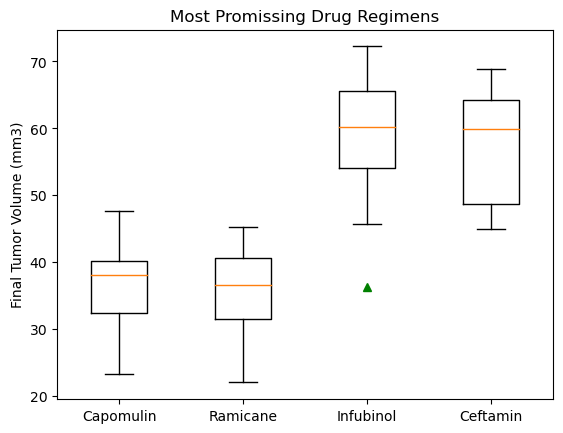

In [72]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


# Create a tick location to be used as reference to the x axis labels
tick_location = list(np.arange(1,5))

# Plot all boxplots within the same figure 
fig0, ax0 = plt.subplots()

# Identify the type of graph, the dataset and customise the outliers symbols
ax0.boxplot(box_plot_df, 0, '^g')

# Set the x axis lables
ax0.set_xticks(tick_location,treatments_list)

# Set the vertical axis name
ax0.set_ylabel('Final Tumor Volume (mm3)')
# Define a title 
ax0.set_title('Most Promissing Drug Regimens')

# Display the graph
plt.show()

## Line and Scatter Plots

In [73]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


# Filter data related to the Capomulin treatment from the cleaned merged df
capomulin_df = clean_merged_df.loc[clean_merged_df['Drug Regimen'] == 'Capomulin']

# check existing Mouse IDs within the Capomulin database that can be used as an example
capomulin_df['Mouse ID'].unique()


array(['b128', 'j246', 'r554', 's185', 'b742', 'x401', 'l509', 's710',
       'r157', 'u364', 'j119', 'v923', 'w914', 'i738', 'r944', 'y793',
       'g316', 'g288', 'l897', 'w150', 't565', 'i557', 'm957', 'f966',
       'm601'], dtype=object)

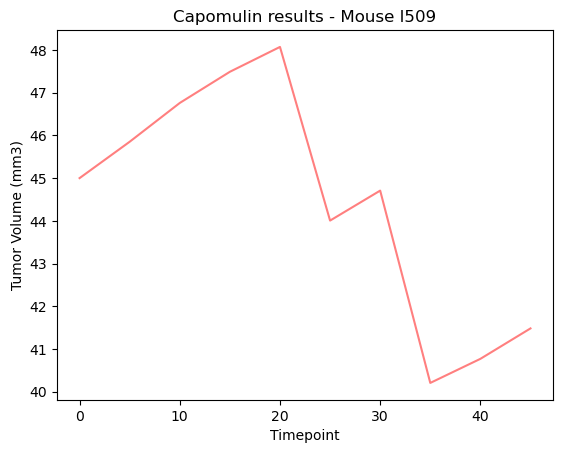

In [74]:
# LINE PLOT

# Filter data for mouse i509
l509_data = capomulin_df.loc[capomulin_df['Mouse ID'] == 'l509']

# Slice the Timepoint column to be used as the x axis info
x_axis_line = l509_data['Timepoint']

# Define the Tumour Volume as the y axis information
y_axis_line = l509_data['Tumor Volume (mm3)']

# Plot the line graph identifying the x axis data, y axis data, the line color and transparency 
plt.plot(x_axis_line, y_axis_line, color = 'red', alpha = 0.5)

#  Add a title
plt.title('Capomulin results - Mouse l509')

# Add a label to x and y axis
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

# Display the chart
plt.show()

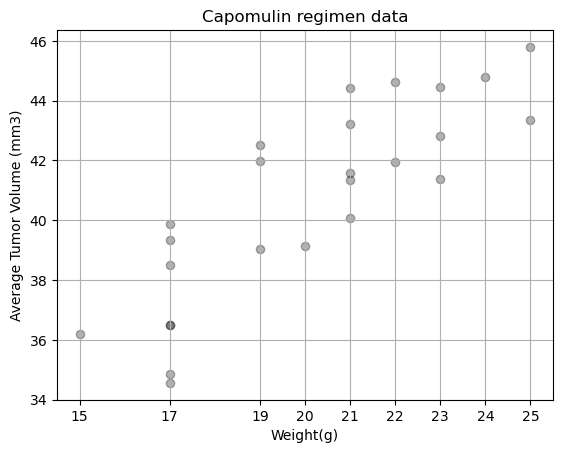

In [75]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# group the data by Mouse ID and calculate the mean
grouped_cap_id = capomulin_df.groupby(['Mouse ID']).mean()

# Specify the Weight column as the x axis
x_scatter = grouped_cap_id['Weight (g)']

# Specify the Tumour Volume column as the y axis
y_scatter = grouped_cap_id['Tumor Volume (mm3)']

# Create list to be used as the x axis values
array = list(x_scatter.unique())
array.sort()
array

# Plot the scatter plot
plt.scatter(x_scatter,y_scatter, color = 'black', alpha=0.3)

# Add a grid for better visualisation
plt.grid()

# Define the created list as the x axis legend
plt.xticks(array)

# Add labels to the axis
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Add title
plt.title('Capomulin regimen data')

# Display the chart
plt.show()

## Correlation and Regression

The correlation between the mouse weight and the average observed tumor volume for the entire Capomulin regimen is 0.84.


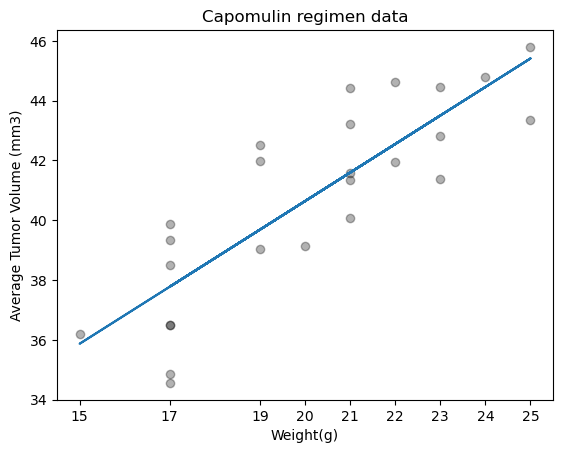

In [78]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


# Calculate the correlation between the variables
correlation = st.pearsonr(x_scatter,y_scatter)
# Print the result
print(f'The correlation between the mouse weight and the average observed tumor volume for the entire Capomulin regimen is {round(correlation[0],2)}.')

# Find the relevant information to build the linear regression line
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_scatter,y_scatter)

# Calculate values for the regression line
regression_line = x_scatter * slope + intercept

# Recycle the code to bring the recently created scatter plot
plt.scatter(x_scatter,y_scatter, color = 'black', alpha=0.3)
plt.xticks(array)
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Capomulin regimen data')

# Plot the linear graph together with the code from the scatter plot.
plt.plot(x_scatter, regression_line)

# Display the graphs together
plt.show()